In [21]:
from pathlib import Path
import glob
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D

import scienceplots


SINGLE_COL_WIDTH = 3.5
DOUBLE_COL_WIDTH = 7.16
DPI = 150

plt.style.use(["science", "ieee"])
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "text.usetex": False,
})

ref_style = {
    "linestyle": "--",
    "color": "black",
    "alpha": 0.7,
    "linewidth": 1.0,
    "label": "ED Reference",
}

# use the color palette manually, since importing seaborn overrides the paper styles
SB_COLORBLIND = [
    "#0173b2",
    "#de8f05",
    "#029e73",
    "#d55e00",
    "#cc78bc",
    "#ca9161",
    "#fbafe4",
    "#949494",
    "#ece133",
    "#56b4e9",
]

main_style = {
    "linestyle": "-",
    "linewidth": 1.0,
    "alpha": 0.9,
    "marker": "o",
    "markersize": 3,
    "markeredgewidth": 0.0,
    "color": SB_COLORBLIND[0],
}

SUPPORT_GUIDE_LS = (0, (1.5, 2.8))  # a bit finer than (2,2)
SUPPORT_GUIDE_LW = 0.75            # thinner
SUPPORT_GUIDE_A  = 0.30            # more transparent
SUPPORT_GUIDE_C  = "0.20"          # slightly lighter gray
SUPPORT_LABEL_A  = 1.0
SUPPORT_LABEL_T = r"Support $g$"

print("Global styles defined.")

Global styles defined.


In [22]:
# --- Load Data Plot 1 ---
file_path = Path("tfim_3x3_suscept_rbm_mc_20251217_142434.csv")
ref_file = Path("tfim_3x3_suscept_ref.csv")

if file_path.exists():
    df = pd.read_csv(file_path)
    h_eval = df["h"].values
    chi_values = df["chi_F"].values
else:
    # Dummy data
    h_eval = np.linspace(1, 4, 20)
    chi_values = np.exp(-(h_eval-2.5)**2)

ref_df = pd.read_csv(ref_file) if ref_file.exists() else None
XLIM = (0.95, 4.05)
print("Data for Plot 1 loaded.")

Data for Plot 1 loaded.


Saved: tfim_3x3_susceptibility.svg


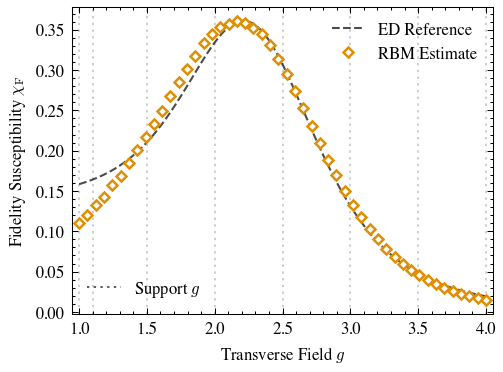

In [23]:
# =========================
# Cell 3 - Fidelity susceptibility (narrow)
# =========================
SAVE_FIG = True
FILENAME = "tfim_3x3_susceptibility.svg"
COLUMN_MODE = "single"

support_lines = [1.00, 1.10, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]

# --- marker style (open diamond) ---
MARKER_SHAPE = "D"
MARKER_SIZE  = 3.3
MARKER_EDGE  = 1.2

# --- main color: use your frozen seaborn-free palette (orange) ---
MAIN_COLOR = SB_COLORBLIND[1]

width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75

fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)

# helps keep guides visible but still behind data
ax.patch.set_zorder(0)

# 1) Reference curve (MATCH global ref_style exactly)
if ref_df is not None and len(ref_df) > 0:
    _ref = dict(ref_style)
    _ref.pop("label", None)  # set label explicitly
    ax.plot(
        ref_df["h"].values,
        ref_df["chi_F"].values,
        label="ED Reference",
        zorder=1,
        **_ref,
    )

# 2) RBM estimate (markers only)
ax.plot(
    h_eval,
    chi_values,
    linestyle="None",
    marker=MARKER_SHAPE,
    markersize=MARKER_SIZE,
    color=MAIN_COLOR,
    markerfacecolor="white",
    markeredgewidth=MARKER_EDGE,
    label="RBM Estimate",
    zorder=2,
)

# 3) Support lines (vertical guides) - use GLOBAL support styling
for g0 in support_lines:
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0.2,
        label="_nolegend_",
    )

ax.set_xlabel(r"Transverse Field $g$")
ax.set_ylabel(r"Fidelity Susceptibility $\chi_\mathrm{F}$")

if XLIM is not None:
    ax.set_xlim(*XLIM)

# --- split legends (support bottom-left, proxy artist with GLOBAL styling) ---
leg_main = ax.legend(loc="upper right", frameon=False)

support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_LABEL_A,
    label=SUPPORT_LABEL_T,
)
leg_support = ax.legend(handles=[support_handle], loc="lower left", frameon=False)
ax.add_artist(leg_main)

ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()

Loaded overlap data: tfim_3x3_overlap_20251217_142126.csv
Saved: tfim_3x3_susceptibility_with_overlap.pdf


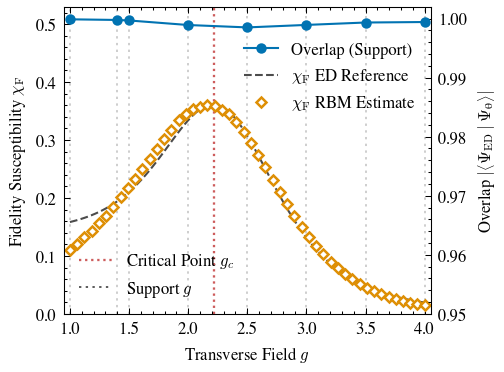

In [28]:
# =========================
# Cell 3 - Susceptibility (left) + Overlap (right)  [narrow]
# =========================
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

SAVE_FIG = True
FILENAME = "tfim_3x3_susceptibility_with_overlap.pdf"
COLUMN_MODE = "single"

# =========================
# DOMINANT DIALS
# =========================
SUSC_YLIM = (0.0, 0.53)
OV_YLIM   = (0.95, 1.002)

# Main legend placement (RIGHT EDGE anchored at right-axis border)
LEGEND_MAIN_X = 1.00
LEGEND_MAIN_Y = 0.77   # vertical placement handle (0..1 in ax2 coords)
LEGEND_MAIN_LOC = "center right"

# legend text (chi first)
LABEL_REF = r"$\chi_\mathrm{F}$ ED Reference"
LABEL_RBM = r"$\chi_\mathrm{F}$ RBM Estimate"
LABEL_OV  = "Overlap (Support)"

# support guides (vertical)
support_lines = [1.00, 1.40, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00]

# --- Critical Point (NEW) ---
GC_VAL   = 2.22
GC_COLOR = "indianred"       # Reverted to the "soft" red
GC_STYLE = ":"               # Dotted
GC_WIDTH = 1.1               # Thinner line width
GC_LABEL = r"Critical Point $g_c$"

# --- susceptibility markers (open diamond) ---
MARKER_SHAPE_SUSC = "D"
MARKER_SIZE_SUSC  = 3.3
MARKER_EDGE_SUSC  = 1.2

# --- overlap markers (FILLED circle) ---
MARKER_SHAPE_OV = "o"
MARKER_SIZE_OV  = 5.0
OVERLAP_LINESTYLE = "-"   # connect blue points

# --- colors (frozen palette) ---
SUSC_COLOR = SB_COLORBLIND[1]   # orange
OV_COLOR   = SB_COLORBLIND[0]   # blue

# --- right-axis (overlap) ticks ---
OV_Y_TICK_STEP = 0.01
OV_Y_TICK_FMT  = "%.2f"

# -------- load latest overlap CSV from current folder --------
pattern = f"tfim_3x3_overlap*.csv"
cands = sorted(Path(".").glob(pattern))
overlap_df = None
if cands:
    overlap_path = max(cands, key=lambda p: p.stat().st_mtime)
    overlap_df = pd.read_csv(overlap_path)
    print(f"Loaded overlap data: {overlap_path.name}")
else:
    print(f"[warn] No overlap file found matching: {pattern}")

# -------- figure --------
width  = SINGLE_COL_WIDTH if COLUMN_MODE == "single" else DOUBLE_COL_WIDTH
height = width * 0.75
fig, ax = plt.subplots(figsize=(width, height), dpi=DPI)
ax.patch.set_zorder(0)

# 1) ED reference susceptibility
if ref_df is not None and len(ref_df) > 0:
    _ref = dict(ref_style)
    _ref.pop("label", None)
    ax.plot(
        ref_df["h"].values,
        ref_df["chi_F"].values,
        label=LABEL_REF,
        zorder=1,
        **_ref,
    )

# 2) RBM susceptibility estimate (markers only)
ax.plot(
    h_eval,
    chi_values,
    linestyle="None",
    marker=MARKER_SHAPE_SUSC,
    markersize=MARKER_SIZE_SUSC,
    color=SUSC_COLOR,
    markerfacecolor="white",
    markeredgewidth=MARKER_EDGE_SUSC,
    label=LABEL_RBM,
    zorder=2,
)

# 3) Support guide lines (no legend)
for g0 in support_lines:
    ax.axvline(
        g0,
        linestyle=SUPPORT_GUIDE_LS,
        linewidth=SUPPORT_GUIDE_LW,
        alpha=SUPPORT_GUIDE_A,
        color=SUPPORT_GUIDE_C,
        zorder=0.2,
        label="_nolegend_",
    )

# 4) Critical Point Line (NEW)
ax.axvline(
    GC_VAL,
    linestyle=GC_STYLE,
    linewidth=GC_WIDTH,
    color=GC_COLOR,
    zorder=0.25, # Slightly above support lines, below data
    label="_nolegend_"
)

ax.set_xlabel(r"Transverse Field $g$")
ax.set_ylabel(r"Fidelity Susceptibility $\chi_\mathrm{F}$")

if XLIM is not None:
    ax.set_xlim(*XLIM)

if SUSC_YLIM is not None:
    ax.set_ylim(*SUSC_YLIM)

# -------- right axis: overlap (support points only) --------
ax2 = ax.twinx()
if overlap_df is not None and len(overlap_df) > 0:
    # ensure ordered by h so line connects properly
    _odf = overlap_df.sort_values("h")

    ax2.plot(
        _odf["h"].values,
        _odf["overlap"].values,
        linestyle=OVERLAP_LINESTYLE,
        linewidth=1.0,
        marker=MARKER_SHAPE_OV,
        markersize=MARKER_SIZE_OV,
        color=OV_COLOR,
        markerfacecolor=OV_COLOR,
        markeredgewidth=0.0,
        label=LABEL_OV,
        zorder=3,
    )

ax2.set_ylabel(
    r"Overlap $\left|\left\langle \Psi_\mathrm{ED}\mid \Psi_{\mathrm{θ}}\right\rangle\right|$"
)
ax2.set_ylim(*OV_YLIM)
ax2.yaxis.set_major_locator(mticker.MultipleLocator(OV_Y_TICK_STEP))
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter(OV_Y_TICK_FMT))

# -------- legends: main (RIGHT EDGE anchored, BLUE FIRST) + guides (lower left) --------
h1, l1 = ax.get_legend_handles_labels()   # [chi_F ED ref, chi_F RBM estimate]
h2, l2 = ax2.get_legend_handles_labels()  # [Overlap (Support)]

handles = h2 + h1
labels  = l2 + l1

leg_main = ax.legend(
    handles,
    labels,
    loc=LEGEND_MAIN_LOC,
    bbox_to_anchor=(LEGEND_MAIN_X, LEGEND_MAIN_Y),
    bbox_transform=ax2.transAxes,
    frameon=False,
)

# --- Lower Left Legend Construction ---
SUPPORT_LABEL_T = globals().get("SUPPORT_LABEL_T", "Support")
SUPPORT_LABEL_A = globals().get("SUPPORT_LABEL_A", SUPPORT_GUIDE_A)

# Handle 1: Critical Point (New)
crit_handle = Line2D(
    [0], [0],
    color=GC_COLOR,
    linestyle=GC_STYLE,
    linewidth=GC_WIDTH,
    label=GC_LABEL
)

# Handle 2: Support (Existing)
support_handle = Line2D(
    [0], [0],
    color=SUPPORT_GUIDE_C,
    linestyle=SUPPORT_GUIDE_LS,
    linewidth=SUPPORT_GUIDE_LW,
    alpha=SUPPORT_LABEL_A,
    label=SUPPORT_LABEL_T,
)

# Combine: Critical Point first (so it appears on top)
leg_support = ax.legend(
    handles=[crit_handle, support_handle],
    loc="lower left",
    frameon=False
)

# Add back the main legend
ax.add_artist(leg_main)

ax.grid(False)
fig.tight_layout()

if SAVE_FIG:
    fig.savefig(FILENAME, bbox_inches="tight")
    print(f"Saved: {FILENAME}")

plt.show()